In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

output = {}

In [5]:
cases_deaths = pd.read_csv("https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv").dropna(subset=["date"])
vaccines = pd.read_csv("httpsb://data.chhs.ca.gov/dataset/e283ee5a-cf18-4f20-a92c-ee94a2866ccd/resource/130d7ba2-b6eb-438d-a412-741bde207e1c/download/covid19vaccinesbycounty.csv")

In [6]:
zip_codes = pd.read_csv("https://data.chhs.ca.gov/dataset/ead44d40-fd63-4f9f-950a-3b0111074de8/resource/ec32eece-7474-4488-87f0-6e91cb577458/download/covid19vaccinesbyzipcode_test.csv")

In [16]:
zip_codes_select = np.array("93067 93441 93111 93108 93109 93013 93103 93101 93110 93105 93440 93460 93463 93434 93427 93454 93117 93458 93254 93455 93436 93429".split(" ")).astype("int")

In [23]:
zip_codes = zip_codes[[(zc in zip_codes_select) for zc in zip_codes.zip_code_tabulation_area]]

In [24]:
zip_codes["date"] = pd.to_datetime(zip_codes["as_of_date"])
last_date = np.max(zip_codes.date)

c:\nexus\data-gh\covid-dashboard\src\package\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
zip_codes[zip_codes.percent_of_population_with_1_plus_dose != zip_codes.percent_of_population_fully_vaccinated + zip_codes.percent_of_population_partially_vaccinated]

,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted,date,vaccinated
60177,2021-08-31,93427,Santa Barbara,Santa Barbara,3.0,Healthy Places Index Score,5341.3,3412.0,465.0,0.638796,0.087057,0.725853,No,2021-08-31,3877.0
60187,2021-08-31,93440,Santa Barbara,Santa Barbara,3.0,Healthy Places Index Score,1389.1,964.0,204.0,0.693975,0.146858,0.840833,No,2021-08-31,1168.0
60189,2021-08-31,93109,Santa Barbara,Santa Barbara,4.0,Healthy Places Index Score,10019.3,7388.0,754.0,0.737377,0.075255,0.812632,No,2021-08-31,8142.0
60217,2021-08-31,93429,Santa Barbara,Santa Barbara,3.0,CDPH-Derived ZCTA Score,144.0,49.0,16.0,0.340278,0.111111,0.451389,No,2021-08-31,65.0
60339,2021-08-31,93101,Santa Barbara,Santa Barbara,3.0,Healthy Places Index Score,27818.3,20404.0,2568.0,0.733474,0.092313,0.825787,No,2021-08-31,22972.0
60995,2021-08-31,93441,Santa Barbara,Santa Barbara,4.0,Healthy Places Index Score,836.7,776.0,84.0,0.927453,0.100394,1.000000,No,2021-08-31,860.0
61153,2021-08-31,93458,Santa Barbara,Santa Barbara,1.0,Healthy Places Index Score,43262.5,26097.0,5384.0,0.603225,0.124450,0.727675,No,2021-08-31,31481.0
61341,2021-08-31,93067,Santa Barbara,Santa Barbara,3.0,CDPH-Derived ZCTA Score,405.2,733.0,97.0,1.000000,0.239388,1.000000,No,2021-08-31,830.0
61629,2021-08-31,93105,Santa Barbara,Santa Barbara,4.0,Healthy Places Index Score,25429.7,17827.0,1741.0,0.701031,0.068463,0.769494,No,2021-08-31,19568.0


In [28]:
zip_codes = zip_codes[zip_codes.date == last_date]
zip_codes["vaccinated"] = zip_codes.persons_fully_vaccinated + zip_codes.persons_partially_vaccinated
zip_codes[["age12_plus_population", "vaccinated", "date", "zip_code_tabulation_area"]].reset_index(drop=True)

,age12_plus_population,vaccinated,date,zip_code_tabulation_area
0,17933.2,14839.0,2021-08-31,93103
1,14495.1,12037.0,2021-08-31,93013
2,5341.3,3877.0,2021-08-31,93427
3,1389.1,1168.0,2021-08-31,93440
4,5926.2,4710.0,2021-08-31,93434
5,10019.3,8142.0,2021-08-31,93109
6,589.7,399.0,2021-08-31,93254
7,144.0,65.0,2021-08-31,93429
8,15517.0,14086.0,2021-08-31,93111
9,27818.3,22972.0,2021-08-31,93101


In [6]:
cases_deaths["date"] = pd.to_datetime(cases_deaths["date"])

vaccines["date"] = pd.to_datetime(vaccines["administered_date"])
vaccines = vaccines.drop(["administered_date"], axis=1)

In [4]:
print(cases_deaths.columns)

Index(['date', 'area', 'area_type', 'population', 'cases', 'cumulative_cases',
       'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests',
       'positive_tests', 'cumulative_positive_tests', 'reported_cases',
       'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests'],
      dtype='object')


In [7]:
vaccines.county = np.where(vaccines.county == "All CA Counties", "California", vaccines.county)
cases_deaths.area = np.where(cases_deaths.area == "All CA Counties", "California", cases_deaths.area)

In [34]:
vaccines.county.unique()

array(['California', 'All CA and Non-CA Counties', 'Alpine', 'Amador',
       'Butte', 'Calaveras', 'Colusa', 'Del Norte', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kings', 'Lake', 'Lassen', 'Madera', 'Marin',
       'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey',
       'Napa', 'Nevada', 'Plumas', 'San Benito', 'Santa Barbara',
       'Shasta', 'Sierra', 'Siskiyou', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Unknown', 'Yuba',
       'Outside California', 'Alameda', 'Contra Costa', 'El Dorado',
       'Fresno', 'Kern', 'Los Angeles', 'Orange', 'Placer', 'Riverside',
       'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Clara',
       'Santa Cruz', 'Solano', 'Sonoma', 'Ventura', 'Yolo'], dtype=object)

In [8]:
combined = vaccines \
    .astype({"county": "string", "date": np.datetime64}) \
    .merge(
        cases_deaths[["date", "area", "population"]].astype({"area": "string"}),
        left_on=["county", "date"],
        right_on=["area","date"],
        how="inner"
    )
    
combined = combined[combined.county != "Unknown"]

In [9]:
all_counties_vaccines = combined[["county", "cumulative_at_least_one_dose", "date", "population", "cumulative_fully_vaccinated"]]

# all_counties_vaccines \
#     .sort_values(by=["county", "date"]) \
#     .to_csv("../../dist/data/ca_vaccines.csv", index=False)

output["ca_vaccines"] = json.loads(all_counties_vaccines \
    .sort_values(by=["county", "date"]) \
    .astype({"date": "string"}) \
    .to_json(orient="records"))

In [11]:
vaccines_data = combined[combined.county == "Santa Barbara"][["date", "population", "cumulative_pfizer_doses", "cumulative_moderna_doses", "cumulative_jj_doses", "cumulative_fully_vaccinated", "cumulative_at_least_one_dose"]]
# vaccines_data \
#     .sort_values(by="date") \
#     .to_csv("../../dist/data/vaccines.csv", index=False)
output["vaccines"] = json.loads(vaccines_data \
    .sort_values(by="date") \
    .astype({"date": "string"}) \
    .to_json(orient="records"))

In [12]:
cases_deaths["pct"] = cases_deaths.cumulative_reported_deaths / cases_deaths.population

# cases_deaths[["date", "area", "pct"]] \
#     .rename({ "area": "county" }, axis=1) \
#     .dropna() \
#     .to_csv("../../dist/data/deaths.csv", index=False)

output["deaths"] = json.loads(cases_deaths[["date", "area", "pct"]] \
    .rename({ "area": "county" }, axis=1) \
    .dropna() \
    .astype({"date": "string"}) \
    .to_json(orient="records"))

In [13]:
sb_cases = cases_deaths[cases_deaths.area == "Santa Barbara"][["date", "cases", "deaths"]]
sb_cases["avg"] = np.convolve(sb_cases.cases, np.ones(7), 'same') / 7
sb_cases["death_avg"] = np.convolve(sb_cases.deaths, np.ones(7), 'same') / 7

output["dailyCases"] = json.loads(sb_cases \
    .astype({"date": "string"}) \
    .to_json(orient="records"))
# sb_cases.to_csv("../../dist/data/dailyCases.csv", index=False)

In [2]:
vaccines_demographics = pd.read_csv("https://data.chhs.ca.gov/dataset/e283ee5a-cf18-4f20-a92c-ee94a2866ccd/resource/71729331-2f09-4ea4-a52f-a2661972e146/download/covid19vaccinesbycountybydemographic.csv")
vaccines_demographics = vaccines_demographics[vaccines_demographics["county"] == "Santa Barbara"]
vaccines_demographics["date"] = pd.to_datetime(vaccines_demographics["administered_date"])
print(vaccines_demographics.columns)

Index(['county', 'county_type', 'demographic_category', 'demographic_value',
       'est_population', 'est_age_12plus_pop', 'administered_date',
       'partially_vaccinated', 'total_partially_vaccinated',
       'fully_vaccinated', 'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'cumulative_unvax_total_pop',
       'cumulative_unvax_12plus_pop', 'suppress_data', 'date'],
      dtype='object')


In [4]:
vaccines_demographics.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_12plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,suppress_data
172159,Santa Barbara,MIXED,Age Group,12-17,33297.0,33297.0,2021-08-18,90.0,3880.0,49.0,14469.0,90.0,18349.0,14948.0,14948.0,False
172160,Santa Barbara,MIXED,Age Group,12-17,33297.0,33297.0,2021-08-17,67.0,3839.0,41.0,14420.0,67.0,18259.0,15038.0,15038.0,False
172161,Santa Barbara,MIXED,Age Group,12-17,33297.0,33297.0,2021-08-16,78.0,3813.0,68.0,14379.0,78.0,18192.0,15105.0,15105.0,False
172162,Santa Barbara,MIXED,Age Group,12-17,33297.0,33297.0,2021-08-15,66.0,3803.0,43.0,14311.0,66.0,18114.0,15183.0,15183.0,False
172163,Santa Barbara,MIXED,Age Group,12-17,33297.0,33297.0,2021-08-14,93.0,3780.0,65.0,14268.0,93.0,18048.0,15249.0,15249.0,False


In [5]:
np.unique(vaccines_demographics.demographic_value)

array(['1', '12-17', '18-49', '2', '3', '4', '50-64', '65+',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Latino', 'Multiracial',
       'Native Hawaiian or Other Pacific Islander', 'Other Race',
       'Unknown', 'White'], dtype=object)

In [15]:
ageGroups = vaccines_demographics[vaccines_demographics.demographic_category == "Age Group"] \
    .reset_index(drop=True)

ageGroups["partialPct"] = ageGroups["cumulative_at_least_one_dose"] / ageGroups["est_population"]

<AxesSubplot:xlabel='date', ylabel='partialPct'>

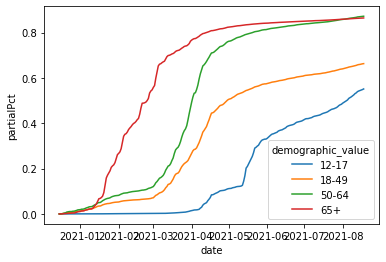

In [16]:
sns.lineplot(
    x="date",
    y="partialPct",
    data=ageGroups,
    hue="demographic_value"
)

In [16]:
output["ages"] = json.loads(ageGroups[["date", "partialPct", 'demographic_value']] \
    .sort_values(by=["demographic_value", "date"]) \
    .reset_index(drop=True) \
    .astype({"date": "string"}) \
    .to_json(orient="records"))

# ageGroups[["date", "partialPct", 'demographic_value']] \
#     .sort_values(by=["demographic_value", "date"]) \
#     .reset_index(drop=True) \
#     .to_csv("../../dist/data/ages.csv")

In [19]:
output.keys()

dict_keys(['ca_vaccines', 'vaccines', 'deaths', 'dailyCases', 'ages'])

In [22]:
import json

with open("../../dist/data/combined.json", "w") as outfile:
    # json.dump(output, outfile)
    outfile.write(json.dumps(output))

In [17]:
np.unique(vaccines_demographics.demographic_category)

array(['Age Group', 'Race/Ethnicity', 'VEM Quartile'], dtype=object)

In [3]:
raceGroups = vaccines_demographics[vaccines_demographics.demographic_category == "Race/Ethnicity"] \
    .reset_index(drop=True)

raceGroups["partialPct"] = raceGroups["cumulative_at_least_one_dose"] / raceGroups["est_population"]

In [5]:
raceGroups = raceGroups[raceGroups.demographic_value != "Unknown"]
raceGroups = raceGroups[raceGroups.demographic_value != "Other Race"]

In [10]:
raceGroups.demographic_value = raceGroups.demographic_value.replace("Native Hawaiian or Other Pacific Islander", "Pacific Islander")
raceGroups.demographic_value = raceGroups.demographic_value.replace("Black or African American", "Black")
raceGroups.demographic_value = raceGroups.demographic_value.replace("American Indian or Alaska Native", "Indigenous")

In [15]:
raceGroups[raceGroups.demographic_value == "Indigenous"]

,county,county_type,demographic_category,demographic_value,est_population,est_age_12plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,suppress_data,date,partialPct
0,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2021-09-04,0.0,134.0,0.0,774.0,0.0,908.0,1016.0,721.0,False,2021-09-04,0.471933
1,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2021-09-03,1.0,134.0,2.0,774.0,1.0,908.0,1016.0,721.0,False,2021-09-03,0.471933
2,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2021-09-02,1.0,135.0,1.0,772.0,1.0,907.0,1017.0,722.0,False,2021-09-02,0.471414
3,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2021-09-01,3.0,135.0,1.0,771.0,3.0,906.0,1018.0,723.0,False,2021-09-01,0.470894
4,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2021-08-31,3.0,133.0,2.0,770.0,3.0,903.0,1021.0,726.0,False,2021-08-31,0.469335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2020-12-19,0.0,1.0,0.0,0.0,0.0,1.0,1923.0,1628.0,False,2020-12-19,0.000520
260,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2020-12-18,0.0,1.0,0.0,0.0,0.0,1.0,1923.0,1628.0,False,2020-12-18,0.000520
261,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2020-12-17,1.0,1.0,0.0,0.0,1.0,1.0,1923.0,1628.0,False,2020-12-17,0.000520
262,Santa Barbara,MIXED,Race/Ethnicity,Indigenous,1924.0,1629.0,2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,1924.0,1629.0,False,2020-12-16,0.000000


<AxesSubplot:xlabel='date', ylabel='partialPct'>

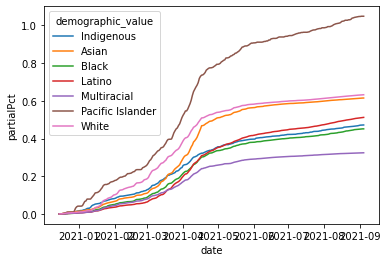

In [11]:
sns.lineplot(
    x="date",
    y="partialPct",
    data=raceGroups,
    hue="demographic_value"
)

In [27]:
raceGroups.groupby("demographic_value").first()

,county,county_type,demographic_category,est_population,est_age_12plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,suppress_data,date,partialPct
demographic_value,,,,,,,,,,,,,,,,,
American Indian or Alaska Native,Santa Barbara,MIXED,Race/Ethnicity,1924.0,1629.0,2021-08-18,2.0,138.0,1.0,753.0,3.0,891.0,1033.0,738.0,False,2021-08-18,0.463098
Asian,Santa Barbara,MIXED,Race/Ethnicity,21708.0,18370.0,2021-08-18,5.0,1039.0,6.0,12135.0,6.0,13174.0,8534.0,5196.0,False,2021-08-18,0.606873
Black or African American,Santa Barbara,MIXED,Race/Ethnicity,7985.0,6757.0,2021-08-18,5.0,455.0,6.0,3012.0,6.0,3467.0,4518.0,3290.0,False,2021-08-18,0.434189
Latino,Santa Barbara,MIXED,Race/Ethnicity,209673.0,177437.0,2021-08-18,136.0,15347.0,118.0,87755.0,157.0,103102.0,106571.0,74335.0,False,2021-08-18,0.491728
Multiracial,Santa Barbara,MIXED,Race/Ethnicity,10288.0,8706.0,2021-08-18,2.0,212.0,1.0,3007.0,2.0,3219.0,7069.0,5487.0,False,2021-08-18,0.312889
Native Hawaiian or Other Pacific Islander,Santa Barbara,MIXED,Race/Ethnicity,800.0,679.0,2021-08-18,0.0,108.0,1.0,717.0,1.0,825.0,0.0,0.0,False,2021-08-18,1.031250
Other Race,Santa Barbara,MIXED,Race/Ethnicity,NaN,NaN,2021-08-18,62.0,4519.0,17.0,18573.0,70.0,23092.0,NaN,NaN,False,2021-08-18,NaN
Unknown,Santa Barbara,MIXED,Race/Ethnicity,NaN,NaN,2021-08-18,12.0,1616.0,6.0,6408.0,14.0,8024.0,NaN,NaN,False,2021-08-18,NaN
White,Santa Barbara,MIXED,Race/Ethnicity,201120.0,170222.0,2021-08-18,48.0,11917.0,60.0,112977.0,64.0,124894.0,76226.0,45328.0,False,2021-08-18,0.620992


In [8]:

nursing = pd.read_csv("https://data.chhs.ca.gov/dataset/7759311f-1aa8-4ff6-bfbb-ba8f64290ae2/resource/d4d68f74-9176-4969-9f07-1546d81db5a7/download/covid19datanursinghome.csv")
nursing = nursing[nursing["county"] == "Santa Barbara"]
print(nursing.columns)
nursing["date"] = pd.to_datetime(nursing["as_of_date"])

Index(['county', 'facility_id', 'facility_name', 'as_of_date',
       'total_resident_cases', 'new_resident_cases', 'total_resident_deaths',
       'total_health_care_worker_cases', 'new_health_care_worker_cases',
       'total_health_care_workers_deaths', 'note'],
      dtype='object')


<AxesSubplot:xlabel='date', ylabel='total_resident_deaths'>

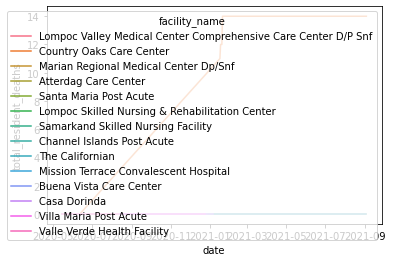

In [9]:
sns.lineplot(
    x="date",
    y="total_resident_deaths",
    data=nursing,
    hue="facility_name"
)